#Tutorial 10: Video Editing II

Name: Lu Fan

Email: cslfan@comp.polyu.edu.hk

Room: WFH


---



# Video Editing Part II

### Table of content
1.   Video Editing Part II
    *   Concatenate Videos
        *   Align size before concatenation
    *   Stack Videos
    *   CompositeVideoClip
        *   Set position
        *   Set start and stop Time
        *   A fancy example
    *    How to get usages of API






---



## **Concatenate Videos**

Concatenating videos is to play them one by one. To do so, we first need to import
`concatenate_videoclips` from `moviepy.editor` .

In [1]:
from moviepy.editor import VideoFileClip, concatenate_videoclips

In following example, the video `concat1` will play video `plane` first and then video
`earth`.

In [2]:
plane = VideoFileClip('plane.mp4')
earth = VideoFileClip('earth.mp4')

In [3]:
plane.size

[640, 480]

In [4]:
earth.size

[960, 540]

In [5]:
## simple concatenation
concat1 = concatenate_videoclips([plane, earth], method="compose")

In [6]:
concat1.write_videofile('test.mp4')

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4

Moviepy - Done !
Moviepy - video ready test.mp4


If `plane` and `earth` have different size (it is the case here), `concat1` will be large
enough to contain the biggest of them, and the smaller video will be played with a
black border.

### **Align size before concatenation**

We may crop or resize videos to same size before concatenation to eliminate black borders. In this example, we crop `earth` to the same size as `plane`.



In [7]:
# crop video earth, so that they
pw, ph = plane.size
ew, eh = earth.size
earth_crop = earth.crop(width=pw, height=ph, x_center=ew/2, y_center=eh/2)
print("earth_crop.size =", earth_crop.size)# [640, 480]

earth_crop.size = (640, 480)


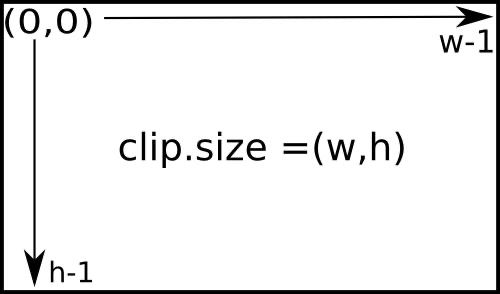

Then we add a transition between videos, and concatenate them. The final video is
written to `concat2.mp4`.

In [8]:
# add fade in/out transition
# add fadeout effect in the last 2s
plane1 = plane.fadeout(2)  
# add fadein effect in the first 2s
plane2 = plane.fadein(2)
# apply both two effects on earth_crop
earth_crop = earth_crop.fadein(2).fadeout(2)
# concatenate them and write to file
final = concatenate_videoclips([plane1, earth_crop, plane2])
final.write_videofile("concat2.mp4")

Moviepy - Building video concat2.mp4.
Moviepy - Writing video concat2.mp4

Moviepy - Done !
Moviepy - video ready concat2.mp4


### **Stack Videos**

Stacking videos is to play them on screen simultaneously. This is achieved by
`clips_array` function.

In [9]:
from moviepy.editor import VideoFileClip, clips_array

This example shows how to stack videos. The resulted video `stack` will have `plane`
played at left top corner and right bottom corner, have `earth` played at left bottom
corner and right top corner.

In [10]:
## direct stack
stack = clips_array([[plane, earth],
                     [earth, plane]])
stack.write_videofile('stack.mp4')

Moviepy - Building video stack.mp4.
Moviepy - Writing video stack.mp4

Moviepy - Done !
Moviepy - video ready stack.mp4


Since `plane` and `earth` have different size, this function will also pad smaller one
with black borders. We can eliminate the borders by aligning their size ahead, too.

In [11]:
# align size
pw, ph = plane.size
ew, eh = earth.size
w, h = min(pw, ew), min(ph, eh) # new size
plane = plane.crop(width=w, height=h,x_center=pw/2, y_center=ph/2)
earth = earth.crop(width=w, height=h, x_center=ew/2, y_center=eh/2)

Besides size, they also have different duration, so the shorter one will become black
after it ends while the longer one is still playing. We had better align their duration, too.

In [12]:
t = min(plane.duration, earth.duration)
plane = plane.subclip(0, t) # get clip from 0s to ts
earth = earth.subclip(0, t) # get clip from 0s to ts


Next, add some fancy effects.

### **Import VFX**

In [13]:
import moviepy.video.fx.all as vfx

In [14]:
# add some fancy effects
plane_mirror = vfx.mirror_x(vfx.mirror_y(plane))
earth_mirror = vfx.mirror_x(vfx.mirror_y(earth))

Finally, stack them and write to file.

In [15]:
# stack them
final = clips_array([[plane, earth_mirror],
                     [earth, plane_mirror]])
final = final.resize(0.5) # make it smaller to save disk space
final.write_videofile("stack2.mp4")

Moviepy - Building video stack2.mp4.
Moviepy - Writing video stack2.mp4

Moviepy - Done !
Moviepy - video ready stack2.mp4


## **CompositeVideoClip**

The `CompositeVideoClip` class provides a more flexible and complex way to
compose clips. Basically, it superimposes clips on others.

In [16]:
from moviepy.video.compositing.CompositeVideoClip import CompositeVideoClip

In [17]:
plane = VideoFileClip('plane.mp4')
earth = VideoFileClip('earth.mp4')

In [18]:
video = CompositeVideoClip([earth, plane, plane.resize(0.5)])
video.write_videofile('composite1.mp4')

Moviepy - Building video composite1.mp4.
Moviepy - Writing video composite1.mp4

Moviepy - Done !
Moviepy - video ready composite1.mp4


### **Set Position**

When create `CompositeVideoClip`, we are allowed to set position for each clip. If no position is set, default one is left top corner. This code snip shows several different way to specify
the position.

In [19]:
# at coordinate (30,30)
plane1 = plane.set_position(pos=(30, 30))
# at center
plane2 = plane.set_position("center")
# at right bottom corner
plane3 = plane.set_position(("right", "bottom"))
# at 20% of the width, 70% of the height of the screen:
plane4 = plane.set_position((0.2,0.7), relative=True)
# horizontally centered, and moving down
plane5 = plane.set_position(lambda t: ('center', 50+100*t))

# create CompositeVideoClip
composite2 = CompositeVideoClip([earth,
plane1, plane2, plane3, plane4, plane5])

composite2.write_videofile('composite2.mp4')


Moviepy - Building video composite2.mp4.
Moviepy - Writing video composite2.mp4

Moviepy - Done !
Moviepy - video ready composite2.mp4


### **Set start and stop Time**

Besides position, we can also set start time and stop time for each clip.

In [20]:
## Set start and stop Time
composite3 = CompositeVideoClip([
earth, # start at 0s by default
plane1.set_start(0.5).set_end(5.),
plane2.set_start(1.0).set_end(10.),
plane3.set_start(1.5).set_end(5.),
plane4.set_start(2.0).set_end(5.),
plane5.set_start(2.5).set_end(5.),
])
composite3.write_videofile('composite3.mp4')

Moviepy - Building video composite3.mp4.
Moviepy - Writing video composite3.mp4

Moviepy - Done !
Moviepy - video ready composite3.mp4


### **A fancy example**

In this example, we fade in 9 `plane` videos. The $9$ videos are arranged as a $3\times3$ grid
and they fade in the order from left top corner to right bottom corner.

In [21]:
composite4 = [earth.set_end(4.0)]  # set earth background
i = 0
for row in ("top", "center", "bottom"):
  for col in ("left", "center", "right"):
    p = plane.set_position((col, row))
    p = p.crossfadein(1) # fade in
    p = p.set_start(i*0.2) # appear one by one
    p = p.subclip(i*0.2) # synchronize them
    composite4.append(p)
    i += 1
composite4 = CompositeVideoClip(composite4)
composite4.write_videofile("composite4.mp4")

Moviepy - Building video composite4.mp4.
Moviepy - Writing video composite4.mp4

Moviepy - Done !
Moviepy - video ready composite4.mp4


## **How to get usages of API**

If you don’t know the usage of some API, you can
1. read the [Reference Manual](https://zulko.github.io/moviepy/ref/ref.html) of MoviePy.
2. or get help infomation in IPython by question command `<function_name>? or
command help(<function_name>)` in Python.

In [22]:
CompositeVideoClip?

In [23]:
help(CompositeVideoClip)

Help on class CompositeVideoClip in module moviepy.video.compositing.CompositeVideoClip:

class CompositeVideoClip(moviepy.video.VideoClip.VideoClip)
 |  CompositeVideoClip(clips, size=None, bg_color=None, use_bgclip=False, ismask=False)
 |  
 |  A VideoClip made of other videoclips displayed together. This is the
 |  base class for most compositions.
 |  
 |  Parameters
 |  ----------
 |  
 |  size
 |    The size (height x width) of the final clip.
 |  
 |  clips
 |    A list of videoclips. Each clip of the list will
 |    be displayed below the clips appearing after it in the list.
 |    For each clip:
 |     
 |    - The attribute ``pos`` determines where the clip is placed.
 |        See ``VideoClip.set_pos``
 |    - The mask of the clip determines which parts are visible.
 |      
 |    Finally, if all the clips in the list have their ``duration``
 |    attribute set, then the duration of the composite video clip
 |    is computed automatically
 |  
 |  bg_color
 |    Color for th

# **The End**

CompositeVideoClip

---

